##    #Import relevant librariers for dataframe and plots 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

###    Read file using pandas

In [2]:
#read file JG

df=pd.read_csv('D:\Heriot-Watt\Dissertation Final\Data.csv',encoding='cp1252')

#### Next phase of code will intially explore the data received to undertsand nature and type of data. Hence, will contain the steps in that order

###    Display main columns and top 5 rows

In [3]:
# display top 5 rows for GP name, user rating, review comment and honest review

df[['GP_Name', 'User_Rating','Review_Comment','Honest_Review']].head()

,GP_Name,User_Rating,Review_Comment,Honest_Review
0,Dr. A,4,"Dr A is a physician in AIIMS hospital, he is v...",1
1,Dr. A,2,He is a doctor who talks with patients rudely ...,0
2,Dr PC,5,"Dr PC is a sincere compassionate, hardworking,...",1
3,Dr PC,1,I am highly disappointed by the casual behavio...,0
4,Dr G,4,She is very good in diagnosis and moreover lis...,1


###    Print shape of datafarme

In [4]:
print (df.shape)

(180, 11)


### Take out basic stats 

In [5]:
df.describe().round(2)

,Id,Age_Range_20-25,Age_Range_26-30,Age_Range_31-35,Age_Range_36-40,Age_Range_40+,Gender,User_Rating,Honest_Review
count,180.00,180.0,180.00,180.00,180.00,180.0,180.00,180.00,180.0
mean,90.50,0.2,0.28,0.29,0.13,0.1,0.57,3.38,0.5
std,52.11,0.4,0.45,0.45,0.33,0.3,0.50,1.41,0.5
min,1.00,0.0,0.00,0.00,0.00,0.0,0.00,1.00,0.0
25%,45.75,0.0,0.00,0.00,0.00,0.0,0.00,2.00,0.0
50%,90.50,0.0,0.00,0.00,0.00,0.0,1.00,4.00,0.5
75%,135.25,0.0,1.00,1.00,0.00,0.0,1.00,5.00,1.0
max,180.00,1.0,1.00,1.00,1.00,1.0,1.00,5.00,1.0


#### Finding intial discrepancies in data

### Find null values

In [6]:
# Create a new df to show null values by column
null_values_df = pd.DataFrame({
    'Column Name': df.columns,
    'Null Values': df.isnull().sum().values
})

print(null_values_df)

        Column Name  Null Values
0                Id            0
1   Age_Range_20-25            0
2   Age_Range_26-30            0
3   Age_Range_31-35            0
4   Age_Range_36-40            0
5     Age_Range_40+            0
6            Gender            0
7           GP_Name            0
8       User_Rating            0
9    Review_Comment            0
10    Honest_Review            0


### Find missing values

In [7]:
# Create a new df to show missing values by column
missing_values_df = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isna().sum().values
})

print(missing_values_df)

        Column Name  Missing Values
0                Id               0
1   Age_Range_20-25               0
2   Age_Range_26-30               0
3   Age_Range_31-35               0
4   Age_Range_36-40               0
5     Age_Range_40+               0
6            Gender               0
7           GP_Name               0
8       User_Rating               0
9    Review_Comment               0
10    Honest_Review               0


## Data Pre Processing

### This step will convert data in to a form required for feature engineering, such a lowering the case of review comments

### Import relevant libraries NLTK, Stirng and import

In [8]:
##first, import nltk and download a list of stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

# import WordNet Lemmatizer 

from nltk.stem.wordnet import WordNetLemmatizer

#import string for tokenisation
import string

#Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Nishant
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nishant
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Nishant
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

####    Removing Punctuation and converting to Lower Case

In [9]:
# define a function which takes text as parameter
def remove_punctuation(txt):
    
    # iterate over each character to get out text without punctuation
    txt_nonpunctuation="".join([c for c in txt if c not in string.punctuation])
    
    # return text
    return txt_nonpunctuation


In [10]:
#Apply above function to column
df['Review_Comment_non_punctuation_lower']=df['Review_Comment'].apply(lambda x:remove_punctuation(x))

#Apply Lower case function to dataframe column 
df['Review_Comment_non_punctuation_lower']=df['Review_Comment'].apply(lambda x:x.lower())


####    Tokenization

In [11]:
# download tokenizer from NLTK
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nishant
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenize the column Review Comments

In [12]:
# apply word tokenize function to newly created lower case column
df['tokenized_comment'] = df['Review_Comment_non_punctuation_lower'].apply(word_tokenize)

# set dataframe displayw width
pd.set_option('display.max_colwidth', None)


 #### POS Tagging

In [13]:
# import function to retrieve POS tags 
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# create new column pos_tags to save the result
df['pos_tags'] = df['tokenized_comment'].apply(pos_tag)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nishant Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Feature Engineering : This step will include extraction of vader and Roberta scores, along with creation of columns including POS ratios

 ### Sentiment Extraction

#### Vader scores

In [14]:
# Vader lexicon download from nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Nishant
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# utilize sentiment function
sia = SentimentIntensityAnalyzer()

#import tqdm for progress bar
from tqdm.notebook import tqdm

In [16]:
# iterate through df rows and assign polarity scores
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review_Comment_non_punctuation_lower']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/180 [00:00<?, ?it/s]

In [17]:
#Transpose result
vaders_result = pd.DataFrame(res).T

In [18]:
#merge results with orignal dataframe
vaders_result = vaders_result.reset_index().rename(columns={'index': 'Id'})
vaders_result = vaders_result.merge(df, how='right')

### Roberta scores

In [19]:
# install transformers by hugging face
!pip install transformers

In [20]:
# import autotokenizer and sequence classification model from pre trained 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [21]:
# Apply model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
import numpy as np
from scipy.special import softmax

In [23]:
# create a function which returns score dictionary 
def polarity_scores_roberta(example):
     # retuern tokenized text
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [24]:
## create an empty dictionary collection to store 
res = {}

#iterate till lenght of df
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review_Comment_non_punctuation_lower'] #extract text
        myid = row['Id'] # extract ID
        vader_result = sia.polarity_scores(text) # calculate vader scores
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value # rename vader columns to specify Vader
        roberta_result = polarity_scores_roberta(text) # calculate roberta polarity
        both = {**vader_result_rename, **roberta_result} # combine scores in a dictionary
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}') #print id in case of error

  0%|          | 0/180 [00:00<?, ?it/s]

In [25]:
#merge results with df
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Linguistic feature

### Average words per sentence

In [26]:
# Calculate average words per sentence and create new column
def calculate_average_words_per_sentence(tokenized_list):
    total_words = sum(1 for token in tokenized_list if token.isalnum())
    total_sentences = len([token for token in tokenized_list if token == "."])
    if total_sentences == 0:
        return 0  
    return total_words / total_sentences

#merge column in df
results_df['average_words_per_sentence'] = results_df['tokenized_comment'].apply(calculate_average_words_per_sentence)


## POS features

 ### Noun Ratio

In [27]:
from nltk import FreqDist

In [28]:
# calculate the ratio of nouns
def calculate_noun_ratio(pos_tags):
    noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  
    return noun_count / total_words

# Calculate and merge the noun ratio to the DataFrame
results_df['noun_ratio'] = results_df['pos_tags'].apply(calculate_noun_ratio)

 ### Adjectives ratio

In [29]:
# calculate the ratio of adjectives
def calculate_adjective_ratio(pos_tags):
    adjective_count = sum(1 for word, tag in pos_tags if tag.startswith('JJ'))
    total_words = len(pos_tags)
    if total_words == 0:
        return 0 
    return adjective_count / total_words

# Calculate and merge the adjective ratio to the DataFrame
results_df['adjective_ratio'] = results_df['pos_tags'].apply(calculate_adjective_ratio)

 ### Prepositions Ratio calculation

In [30]:
# Calculate the ratio of prepositions
def calculate_preposition_ratio(pos_tags):
    preposition_count = sum(1 for word, tag in pos_tags if tag == 'IN')
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  
    return preposition_count / total_words

# Calculate and merge the Prepositions ratio to the DataFrame
results_df['preposition_ratio'] = results_df['pos_tags'].apply(calculate_preposition_ratio)

 ### Determiners ratio

In [31]:
# Calculate the ratio of determiners
def calculate_determiner_ratio(pos_tags):
    determiner_count = sum(1 for word, tag in pos_tags if 'DT' in tag)
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  
    return determiner_count / total_words

# Calculate and add the determiner ratio to the DataFrame
results_df['determiner_ratio'] = results_df['pos_tags'].apply(calculate_determiner_ratio)

 ### verbs ratio

In [32]:
# Calculate the ratio of verbs
def calculate_verb_ratio(pos_tags):
    verb_count = sum(1 for word, tag in pos_tags if tag.startswith('VB'))
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  
    return verb_count / total_words

# Calculate and merge the verb ratio to the DataFrame
results_df['verb_ratio'] = results_df['pos_tags'].apply(calculate_verb_ratio)

   ### Adverbs ratio

In [33]:
# Calculate the ratio of adverbs
def calculate_adverb_ratio(pos_tags):
    adverb_count = sum(1 for word, tag in pos_tags if tag.startswith('RB'))
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  # Avoid division by zero
    return adverb_count / total_words

# Calculate and merge the adverb ratio to the DataFrame
results_df['adverb_ratio'] = results_df['pos_tags'].apply(calculate_adverb_ratio)


 ### Conjuctions ratio

In [34]:
# Calculate the ratio of connector words (conjunctions)
def calculate_conjuction_ratio(pos_tags):
    conjuction_count = sum(1 for word, tag in pos_tags if tag == 'CC')
    total_words = len(pos_tags)
    if total_words == 0:
        return 0 
    return conjuction_count / total_words

# Calculate and merge the conjunction ratio to the DataFrame
results_df['conjuction_ratio'] = results_df['pos_tags'].apply(calculate_conjuction_ratio)


### Pronouns ratio

In [35]:
# Calculate the ratio of pronouns
def calculate_pronoun_ratio(pos_tags):
    pronoun_count = sum(1 for word, tag in pos_tags if tag.startswith('PRP'))
    total_words = len(pos_tags)
    if total_words == 0:
        return 0  
    return pronoun_count / total_words

# Calculate and merge the pronoun ratio to the DataFrame
results_df['pronoun_ratio'] = results_df['pos_tags'].apply(calculate_pronoun_ratio)

### Roberta compound- Sentiment Score

In [36]:
# Derive a new column which mentions the compound score
results_df['roberta_compound'] = results_df['roberta_pos'] - results_df['roberta_neg']

In [37]:
# Display the dataframe with the new feature and round off the result
results_df [['roberta_neu','roberta_pos','roberta_neg','roberta_compound']].head(5).round(2)

,roberta_neu,roberta_pos,roberta_neg,roberta_compound
0,0.12,0.88,0.00,0.87
1,0.07,0.00,0.92,-0.92
2,0.02,0.98,0.00,0.97
3,0.03,0.00,0.97,-0.96
4,0.05,0.94,0.00,0.94


### Next, decision needs to be taken for  Vader and Roberta based on  comparison of polarity scores, Roberta scores look better than Vader

In [38]:
# Display Vader and Roberta columns
results_df [['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound','Review_Comment','roberta_neg','roberta_neu','roberta_pos','roberta_compound']].head(4).round(2)

,vader_neg,vader_neu,vader_pos,vader_compound,Review_Comment,roberta_neg,roberta_neu,roberta_pos,roberta_compound
0,0.06,0.84,0.10,0.34,"Dr A is a physician in AIIMS hospital, he is very organized doctor. He never delays an appointment. He spends good time with patients to understand them thoroughly based on which he prescribe medicines. He has always helped and adviced in emergency situations as well.",0.00,0.12,0.88,0.87
1,0.18,0.82,0.00,-0.49,"He is a doctor who talks with patients rudely and generally, there are delays in his appointments.",0.92,0.07,0.00,-0.92
2,0.00,0.72,0.28,0.96,"Dr PC is a sincere compassionate, hardworking, ever diligent doctor. I recommend this doctor as she believes in providing evidence based care to her patients. She explains things in a very simple way and responds to every query even on phone. I feel satisfied as a patient. She is too efficient in her work. I visited her during my pregnancy and she has been very supportive and calm during the entire process.",0.00,0.02,0.98,0.97
3,0.21,0.69,0.10,-0.63,I am highly disappointed by the casual behavior of the doctor. I was not satisfied by the treatment provided. There was no explanation of the health issue and the treatment. There is no proper medical care and attention given to the patients.,0.97,0.03,0.00,-0.96


## Data visualisation : This section will involve various visualisations

 ### Age and Gender Distribution

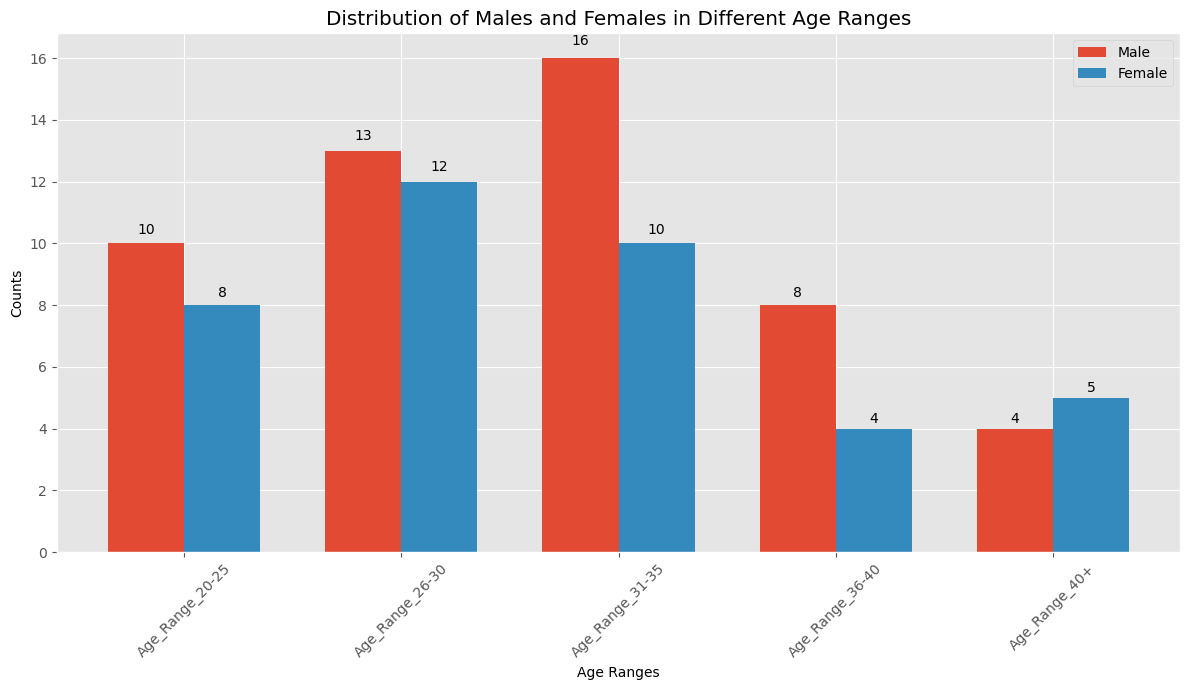

In [39]:
import matplotlib.pyplot as plt

honest_reviews = results_df[results_df['Honest_Review'] == 1]

# Initialize empty lists to store male and female counts
male_counts = []
female_counts = []
age_ranges = ['Age_Range_20-25', 'Age_Range_26-30', 'Age_Range_31-35', 'Age_Range_36-40', 'Age_Range_40+']

# For each age range, count the number of males (1s in 'Gender_Male' for that age range)
# and females (total in that age range minus males)
for age_range in age_ranges:
    males = honest_reviews[honest_reviews[age_range] == 1]['Gender'].sum()
    females = honest_reviews[honest_reviews[age_range] == 1].shape[0] - males

    male_counts.append(males)
    female_counts.append(females)

# Position of bars on x axis
ind = range(len(age_ranges))

# Width of a bar
width = 0.35       

# Create a larger figure to make room for the labels
plt.figure(figsize=(12,7))

# Creating the bars
bars_males = plt.bar(ind, male_counts, width, label='Male')
bars_females = plt.bar([i + width for i in ind], female_counts, width, label='Female')

# Function to display the label on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 1.02*height,
                '%d' % int(height), ha='center', va='bottom')

autolabel(bars_males)
autolabel(bars_females)

# Defining the labels and title
plt.xlabel('Age Ranges')
plt.ylabel('Counts')
plt.title('Distribution of Males and Females in Different Age Ranges')
plt.xticks([i + width / 2 for i in ind], age_ranges, rotation=45)  # rotating the x-axis labels
plt.legend(loc='best')

plt.tight_layout()
plt.show()



### Count plot for Honest and Fake Review

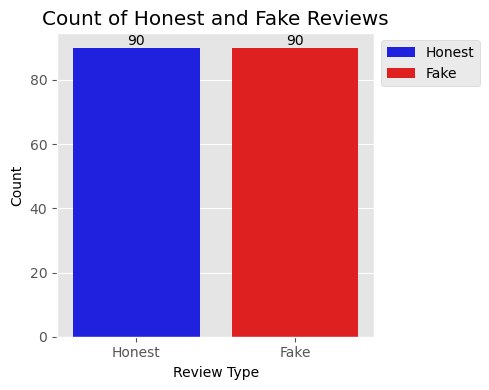

In [40]:
# Create a count plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=results_df, x='Honest_Review', palette=['blue', 'red'])

# add data lables
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels, title, and legend
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Count of Honest and Fake Reviews')
plt.xticks([0, 1], ['Honest', 'Fake'])
plt.legend(handles=ax.patches, labels=['Honest', 'Fake'], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

   ### User Rating stats and frequency based on honest and fake reviews

In [41]:
# Calculate mean, median and standard deviation in a new dataframe
stats_df = results_df.groupby('Honest_Review')['User_Rating'].agg(['mean', 'median', 'std',lambda x: x.mode().iloc[0]])

# Rename index and columns
stats_df = stats_df.rename(index={0: "Fake", 1: "Honest"})
stats_df.columns = ['Mean', 'Median', 'Standard Deviation', 'Mode']

# make table visuals
stats_df=stats_df.round(2)
stats_df

stats_df.style.set_table_attributes('style="font-size: 16px"').set_caption('User Rating')
styled_stats_df = stats_df.style.format("{:.2f}")  # format to 2 decimal places
styled_stats_df.set_table_attributes('style="font-size: 16px"').set_caption('User Rating')

,Mean,Median,Standard Deviation,Mode
Honest_Review,,,,
Fake,2.61,2.00,1.35,2.00
Honest,4.14,4.00,1.00,5.00


### Histogram for fake and honest reviews user rating

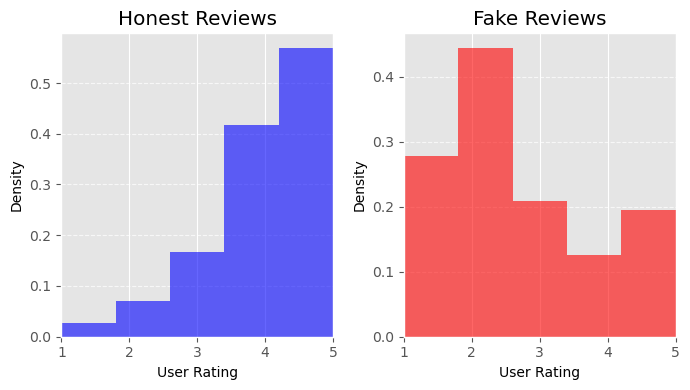

In [42]:
# Split the dataframe based on Honest_Review column
honest_reviews = results_df[results_df['Honest_Review'] == 1]['User_Rating']
fake_reviews = results_df[results_df['Honest_Review'] == 0]['User_Rating']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Plot histogram for Honest Reviews
axes[0].hist(honest_reviews, bins=5, alpha=0.6, color="blue", density=True)
axes[0].set_title("Honest Reviews")
axes[0].set_xlabel("User Rating")
axes[0].set_ylabel("Density")
axes[0].set_xlim(1, 5)
axes[0].set_xticks([1, 2, 3, 4, 5])
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for Fake Reviews
axes[1].hist(fake_reviews, bins=5, alpha=0.6, color="red", density=True)
axes[1].set_title("Fake Reviews")
axes[1].set_xlabel("User Rating")
axes[1].set_ylabel("Density")
axes[1].set_xlim(1, 5)
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

### Further deep diving ti check the presence of outliers

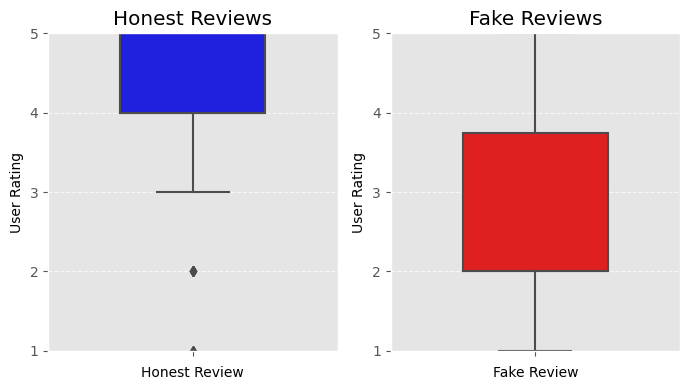

In [43]:
# Split the dataframe based on Honest_Review column
honest_reviews = results_df[results_df['Honest_Review'] == 1]['User_Rating']
fake_reviews = results_df[results_df['Honest_Review'] == 0]['User_Rating']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Box plot for Honest Reviews
sns.boxplot(y=honest_reviews, ax=axes[0], color="blue", width=0.5)
axes[0].set_title("Honest Reviews")
axes[0].set_xlabel("Honest Review")
axes[0].set_ylabel("User Rating")
axes[0].set_ylim(1, 5)
axes[0].set_yticks([1, 2, 3, 4, 5])
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for Fake Reviews
sns.boxplot(y=fake_reviews, ax=axes[1], color="red", width=0.5)
axes[1].set_title("Fake Reviews")
axes[1].set_xlabel("Fake Review")
axes[1].set_ylabel("User Rating")
axes[1].set_ylim(1, 5)
axes[1].set_yticks([1, 2, 3, 4, 5])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

#### Above plot indicates outliers, hence, printing those below

In [44]:
# Filtering the dataset based on the conditions
newdf=results_df[(results_df['User_Rating'].isin([1, 2])) & (results_df['Honest_Review'] == 1)]
newdf[['GP_Name', 'User_Rating','Review_Comment','Honest_Review']]

,GP_Name,User_Rating,Review_Comment,Honest_Review
10,Dr Z,2,He early predicts the problem without proper diagnosis. Most of the time he prescribes high dose medicine without realising individuals tolerance. He doesn't listen to his patients patiently.,1
46,Dr k,1,"Unhelpful, always tries to get rid of their patients rather supporting them! They don?t listen to you even tho you tell them that you are experiencing pain and you want a check up for your regular condition!",1
62,Dr. At,1,He is not good in his work.,1
150,Dr Sn,2,Not much satisfied with the services they provide after long waiting time for your appointment. Whenever i came up with any illness i can't handle by my self i never got any satisfactory remedies from my doctor for that. The staff is polite but not so knowledgeable.,1
160,Dr Ku,2,"He’s my family doctor but I don’t like him, his old ways of packets and not medicine names.",1
166,Dr. Su,2,"His team is quite helpful. Doctor is okayish, is always in a hurry not a good listener!",1
168,Dr. Ty,2,Doctor was not serious. I explained the medical condition of my mother and the reports but he was least interested and proposed to visit another specialist in Delhi.,1


### Basic statistics for a subset of derived continuous features

In [45]:
grouped = results_df.groupby('Honest_Review')[[ 'roberta_compound', 'average_words_per_sentence', 'adverb_ratio' ,'noun_ratio', 'adjective_ratio', 'verb_ratio']].describe()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
# Display the results
    print (grouped)

              roberta_compound                                            \
                         count  mean   std   min   25%   50%   75%   max   
Honest_Review                                                              
0                         90.0 -0.27  0.80 -0.98 -0.94 -0.79  0.77  0.99   
1                         90.0  0.55  0.58 -0.96  0.41  0.87  0.94  0.99   

              average_words_per_sentence                                 \
                                   count   mean   std  min   25%    50%   
Honest_Review                                                             
0                                   90.0   8.30  7.09  0.0  0.00   8.17   
1                                   90.0  11.42  7.95  0.0  7.05  10.88   

                            adverb_ratio                                     \
                 75%    max        count  mean   std  min   25%   50%   75%   
Honest_Review                                                                 
0     

#### Box Plots for all POS ratios

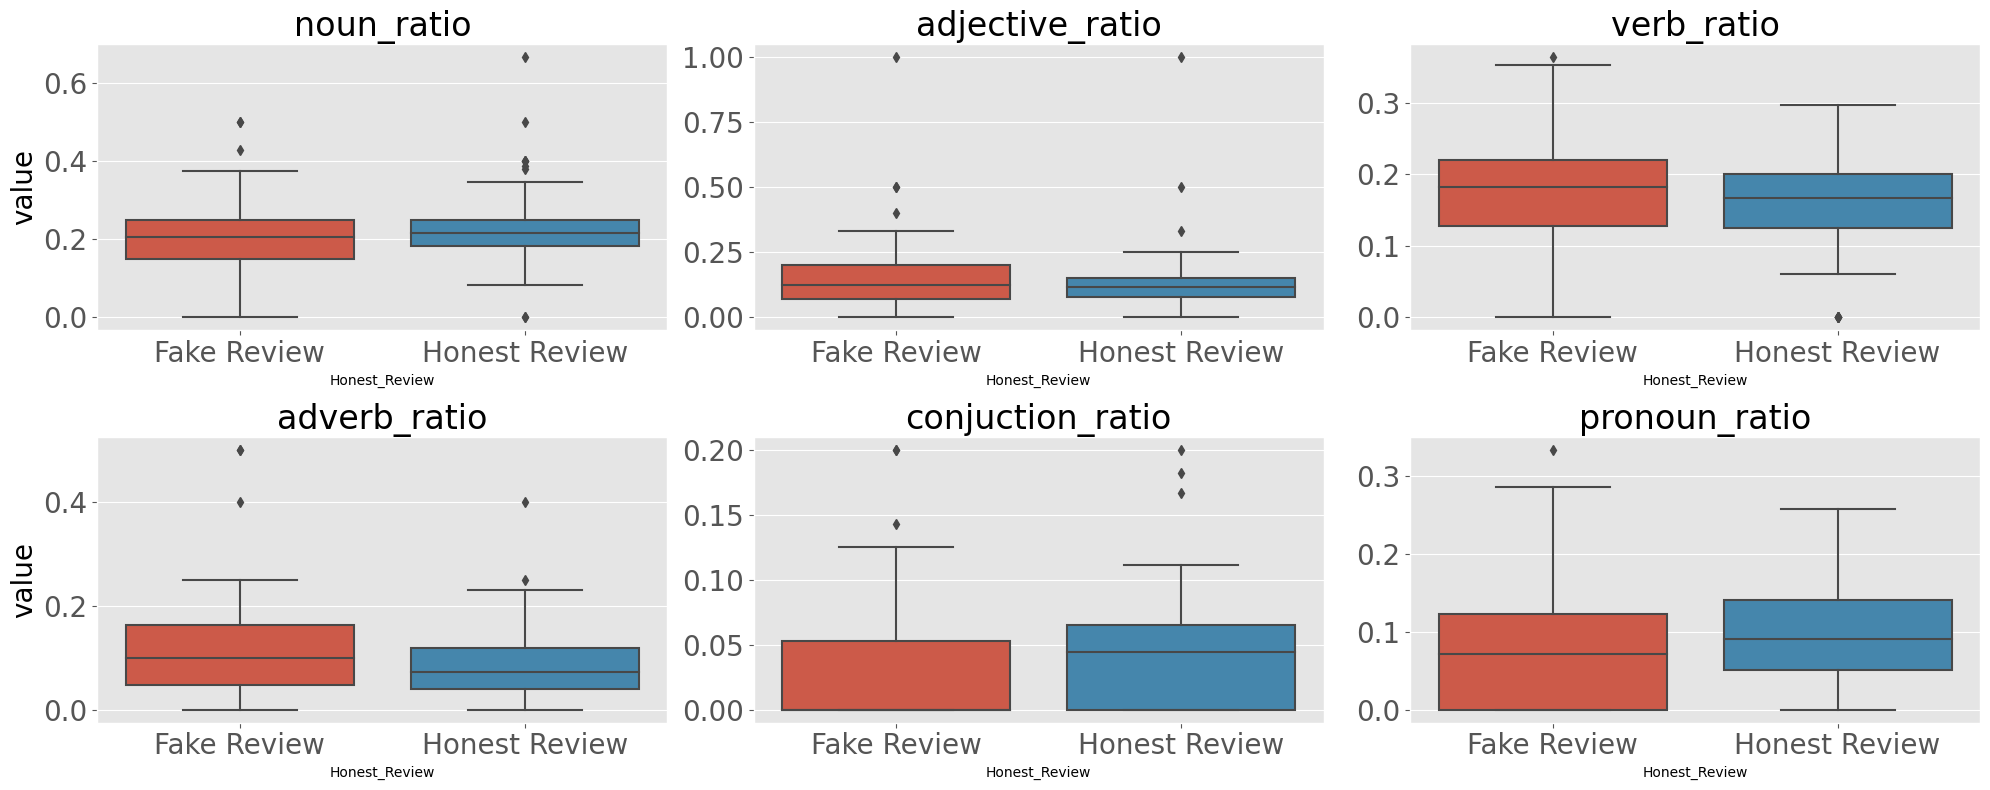

In [46]:
# create an array
pos_features = ['noun_ratio', 'adjective_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio', 'pronoun_ratio']

# Create plot objects
fig, axes = plt.subplots(2, 3, figsize=(20, 8))  # 2 rows, 3 columns

# Define font size
title_font_size = 24
label_font_size = 20
tick_font_size = 20

# Get column index
for index, feature in enumerate(pos_features):
    row, col = divmod(index, 3)  
    
    sns.boxplot(x=results_df['Honest_Review'], y=results_df[feature], ax=axes[row][col])
    
    # Set font size for title
    axes[row][col].set_title(f"{feature}", fontsize=title_font_size)
    
    axes[row][col].set_xticks([0, 1])
    axes[row][col].set_xticklabels(['Fake Review', 'Honest Review'], fontsize=tick_font_size)
    
    if col > 0:
        axes[row][col].set_ylabel('') 
    else:
        axes[row][col].set_ylabel('value', fontsize=label_font_size)

    # Y-tick labels and their size
    axes[row][col].tick_params(axis='y', labelsize=tick_font_size)
    axes[row][col].tick_params(axis='x', labelsize=tick_font_size)

plt.tight_layout()
plt.show()

#### Investigating Linguistic feature : Average words per sentence

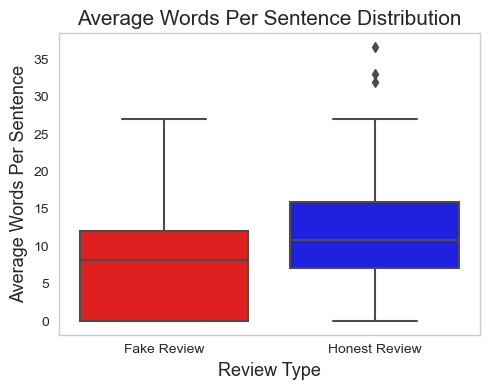

In [47]:
# Define the color palette
palette = {0: 'red', 1: 'blue'}

# Setting Seaborn style
sns.set_style("whitegrid", {'axes.grid' : False})

# Create a figure and ax object
fig, ax = plt.subplots(figsize=(5, 4))

# Box plot for average_words_per_sentence based on review type
sns.boxplot(x=results_df['Honest_Review'], y=results_df['average_words_per_sentence'], ax=ax, palette=palette)
ax.set_title('Average Words Per Sentence Distribution', fontsize=15)
ax.set_xlabel('Review Type', fontsize=13)
ax.set_ylabel('Average Words Per Sentence', fontsize=13)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fake Review', 'Honest Review'])

plt.tight_layout()
plt.show()

### This section will focus on sentiment score and related analysis. Roberta_compound is final sentiment score

### Calculate mean and median sentiment scores

In [48]:
honest_data = results_df[results_df['Honest_Review'] == 1]
fake_data = results_df[results_df['Honest_Review'] == 0]
print (honest_data['roberta_compound'].mean(),honest_data['roberta_compound'].median()," ", fake_data['roberta_compound'].mean(),fake_data['roberta_compound'].median())

0.5505140099441632 0.8691291071008891   -0.2714478575094189 -0.7859045248478651


### Box plot to visualize distribution for honest and fake reviews

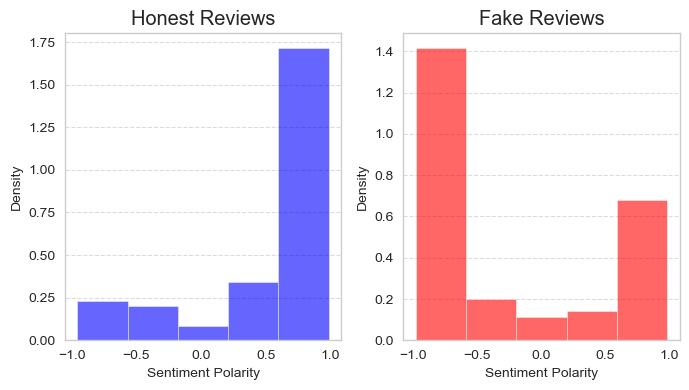

In [49]:
# Split the dataframe based on Honest_Review column
honest_reviews = results_df[results_df['Honest_Review'] == 1]['roberta_compound']
fake_reviews = results_df[results_df['Honest_Review'] == 0]['roberta_compound']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Plot histogram for Honest Reviews
axes[0].hist(honest_reviews, bins=5, alpha=0.6, color="blue", density=True)
axes[0].set_title("Honest Reviews")
axes[0].set_xlabel("Sentiment Polarity")
axes[0].set_ylabel("Density")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for Fake Reviews
axes[1].hist(fake_reviews, bins=5, alpha=0.6, color="red", density=True)
axes[1].set_title("Fake Reviews")
axes[1].set_xlabel("Sentiment Polarity")
axes[1].set_ylabel("Density")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


### Cat Plot for distribution of sentiment score

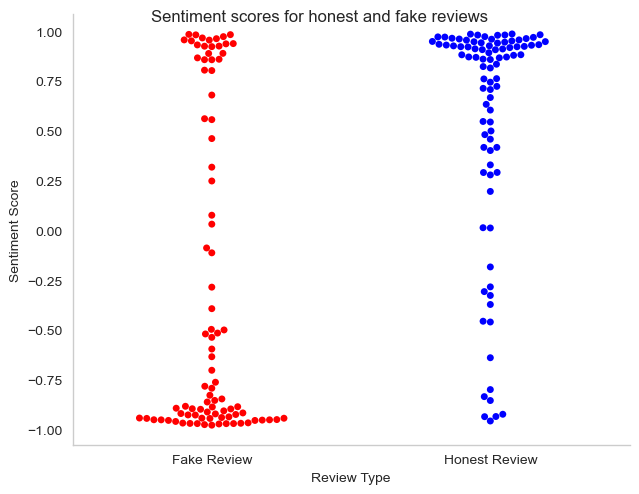

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the overall aesthetic for seaborn plot
sns.set_style("whitegrid", {'axes.grid' : False})

# Creating a catplot
g = sns.catplot(x="Honest_Review", y="roberta_compound", hue="Honest_Review", data=results_df, kind="swarm", palette={1: 'blue', 0: 'red'}, aspect=1.3)

# Setting the axis labels and title
g.set_axis_labels("Review Type", "Sentiment Score")
g.fig.suptitle("Sentiment scores for honest and fake reviews")

# Replacing the x-axis labels for clarity
g.set_xticklabels(["Fake Review", "Honest Review"])

plt.show()

### Box Plot for sentiment score honest vs fake reviews

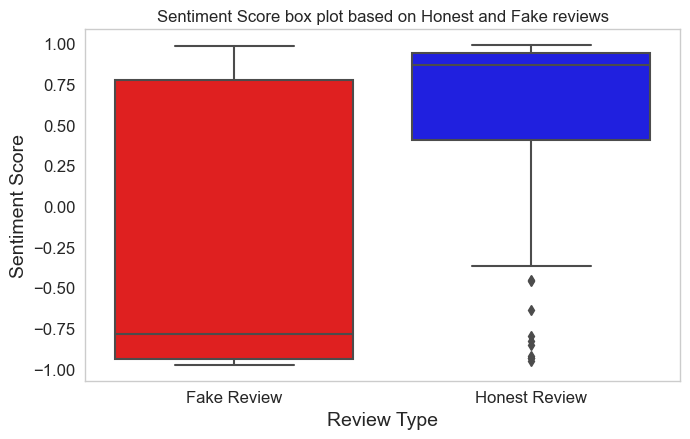

In [51]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(7, 4.5))

# Font sizes
title_font_size = 12
label_font_size = 14
tick_font_size = 12

# Define a color palette
palette = {0: 'red', 1: 'blue'}

# Box plot for sentiment score
sns.boxplot(x=results_df['Honest_Review'], y=results_df['roberta_compound'], ax=ax, palette=palette)
ax.set_title("Sentiment Score box plot based on Honest and Fake reviews", fontsize=title_font_size)
ax.set_xlabel("Review Type", fontsize=label_font_size)
ax.set_ylabel("Sentiment Score", fontsize=label_font_size)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fake Review', 'Honest Review'], fontsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

plt.tight_layout()
plt.show()

### Mean and median sentiment score

In [52]:
honest_data = results_df[results_df['Honest_Review'] == 1]
fake_data = results_df[results_df['Honest_Review'] == 0]
print (honest_data['roberta_compound'].mean(),honest_data['roberta_compound'].median()," ", fake_data['roberta_compound'].mean(),fake_data['roberta_compound'].median())

0.5505140099441632 0.8691291071008891   -0.2714478575094189 -0.7859045248478651


### Gender vs Sentiment score

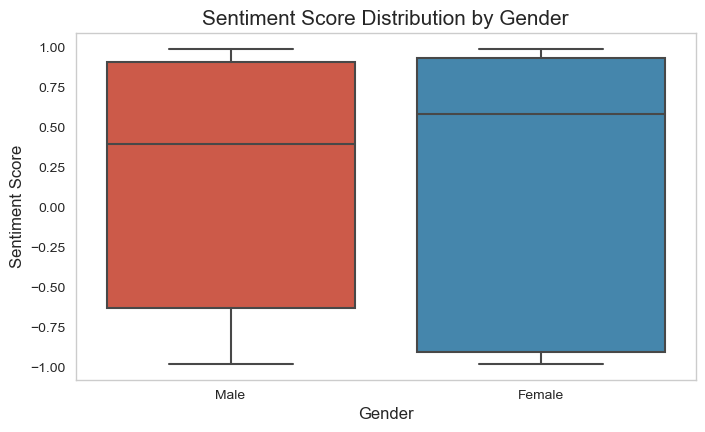

In [53]:
# creat new column to store Male and Female as values
results_df['Gender_new'] = results_df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Create the plot
plt.figure(figsize=(8, 4.5))
ax = sns.boxplot(data=results_df, x='Gender_new', y='roberta_compound')
plt.title('Sentiment Score Distribution by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Remove the grid
ax.grid(False)

plt.show()


### Mean and median values for sentiment score based on gender

In [54]:
# Calculate mean
mean_values = results_df.groupby(['Gender_new', 'Honest_Review'])['roberta_compound'].mean().unstack().round(2)

# Calculate median
median_values = results_df.groupby(['Gender_new', 'Honest_Review'])['roberta_compound'].median().unstack().round(2)

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)

Mean values:
 Honest_Review     0     1
Gender_new               
Female        -0.39  0.60
Male          -0.18  0.51

Median values:
 Honest_Review     0     1
Gender_new               
Female        -0.89  0.91
Male          -0.50  0.84


### Sentiment score vs Star rating whisker 

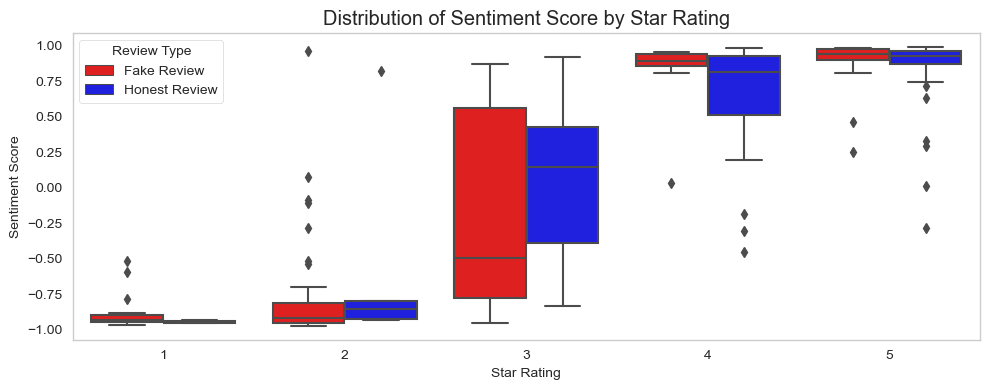

In [55]:
# color palette
palette = {0: 'red', 1: 'blue'}

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 4))
sns.boxplot(x="User_Rating", y="roberta_compound", hue="Honest_Review", data=results_df, palette=palette)

# Add titles and labels
plt.title("Distribution of Sentiment Score by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Sentiment Score")

# Modify the legend
legend_labels, _= plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['Fake Review', 'Honest Review'], title="Review Type", loc="upper left")

plt.tight_layout()
plt.show()

### Printing outliers based on conditions for sentiment vs star rating

In [56]:
# Filtering the dataset based on the conditions
newdf1=results_df[(results_df['User_Rating'].isin([4,5])) & (results_df['Honest_Review'] == 1) & (results_df['roberta_compound'] <= 0.25)]
newdf1[['GP_Name', 'User_Rating','Review_Comment','Honest_Review','roberta_compound','vader_compound']]

,GP_Name,User_Rating,Review_Comment,Honest_Review,roberta_compound,vader_compound
20,Dr. M,5,He is an English medicine doctor who tries to understand what we are going through physically. Later gives medication for certain number of days and also he tries to keep track with the patients health.,1,0.015031,0.3400
32,Dr. J,4,"He has a good knowledge, cares about his patients but his words may come out to be rude at times.",1,-0.181962,-0.2617
60,Dr RC,4,Sincere and understand problem Provide medication as per disease Consultation fee is costly as compared to other doctors,1,-0.454479,-0.1027
80,Mr . RG,5,He generally gives medication only if needed and doesn't give lengthy list of medical tests to evaluate. Listens carefully what patient is trying to say,1,-0.281988,0.1280
110,Dr Dk,4,General Physician For Cold & Cough,1,-0.305728,0.0000
162,Dr. Kj,4,He’s very knowledgeable and doesn’t prescribe antibiotics until or unless the situation is very bad. Tries his best by suggesting physical activities/exercises.,1,0.197181,0.1045


### Sentiment vs Word Count Scatter

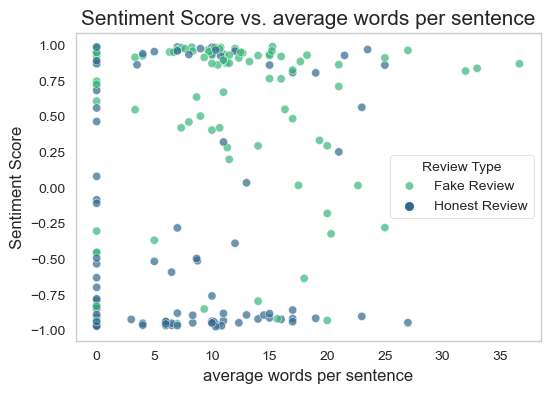

In [57]:
# Scatter plot
plt.figure(figsize=(6, 4))

sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(data=results_df, x='average_words_per_sentence', y='roberta_compound', hue='Honest_Review', palette="viridis", alpha=0.7)
plt.title('Sentiment Score vs. average words per sentence', fontsize=15)
plt.xlabel('average words per sentence', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.legend(title='Review Type', labels=['Fake Review', 'Honest Review'])
plt.show()

## SPLOM :sentiment score vs POS Ratios

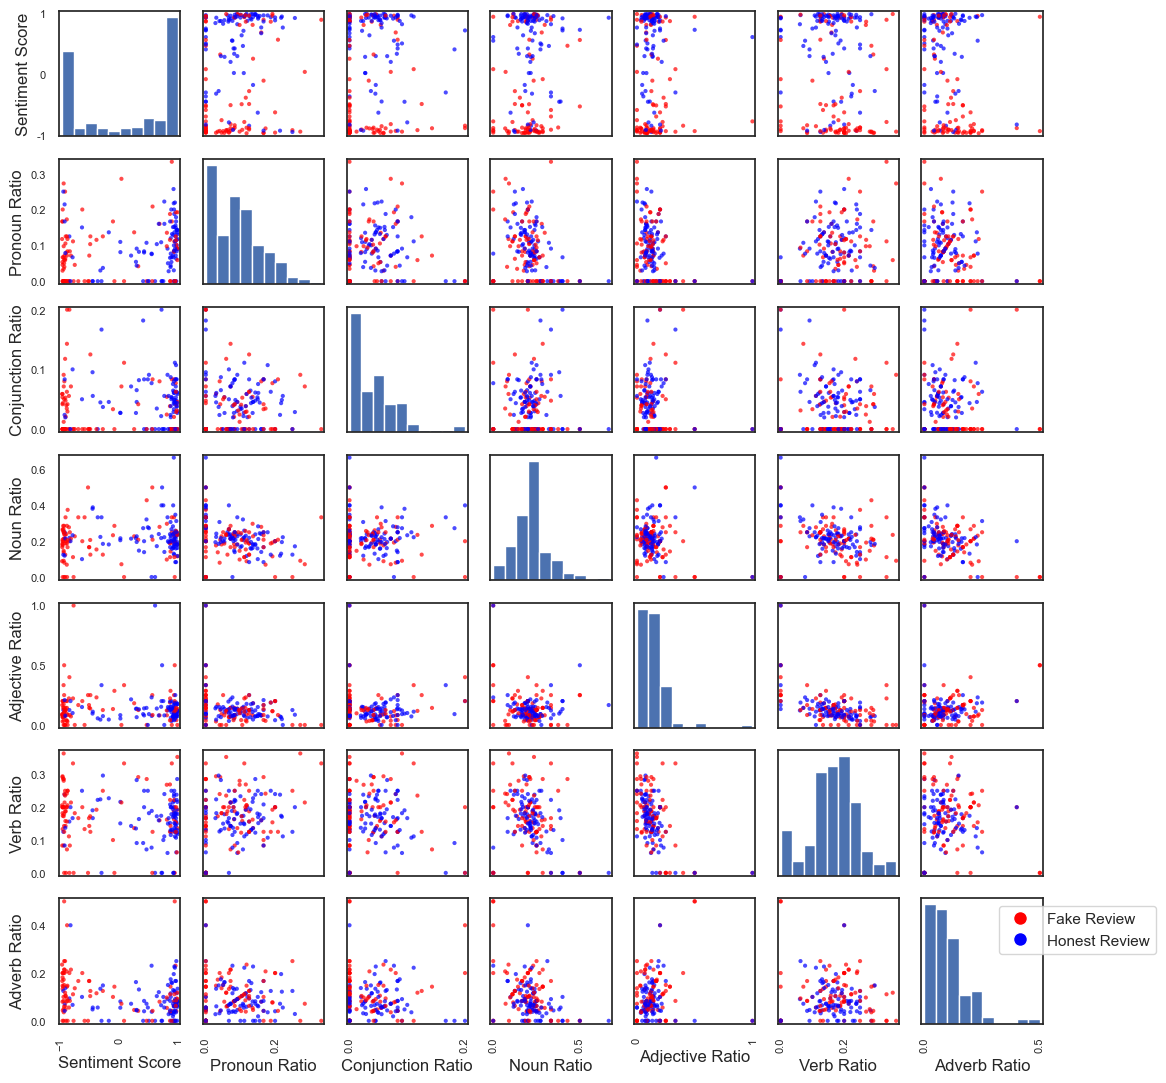

In [69]:
from pandas.plotting import scatter_matrix


# Rename columns for the purpose of plotting
results_df = results_df.rename(columns={'roberta_compound': 'Sentiment Score', 
                                        'pronoun_ratio': 'Pronoun Ratio', 
                                        'conjuction_ratio': 'Conjunction Ratio',
                                        'noun_ratio': 'Noun Ratio',
                                        'adjective_ratio': 'Adjective Ratio',
                                        'verb_ratio': 'Verb Ratio',
                                        'adverb_ratio': 'Adverb Ratio'})

# Features for scatter matrix
features = ['Sentiment Score', 'Pronoun Ratio', 'Conjunction Ratio', 'Noun Ratio', 'Adjective Ratio', 'Verb Ratio', 'Adverb Ratio']

# Creating a color map based on the 'Honest_Review' column
colors = results_df['Honest_Review'].map({0: 'red', 1: 'blue'})

# Plotting scatter matrix with an increased figure size and color-coded points
scatter_matrix(results_df[features], figsize=(12, 11), diagonal='hist', c=colors, alpha=0.7)

# Adding a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Fake Review', markersize=10, markerfacecolor='red'),
                   Line2D([0], [0], marker='o', color='w', label='Honest Review', markersize=10, markerfacecolor='blue')]


plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2, 1))

plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()

# Rename the columns back to their original names
results_df = results_df.rename(columns={'Sentiment Score': 'roberta_compound',
                                        'Pronoun Ratio': 'pronoun_ratio',
                                        'Conjunction Ratio': 'conjuction_ratio',
                                        'Noun Ratio': 'noun_ratio',
                                        'Adjective Ratio': 'adjective_ratio',
                                        'Verb Ratio': 'verb_ratio',
                                        'Adverb Ratio': 'adverb_ratio'})


## Create a word cloud

In [59]:
!pip install wordcloud

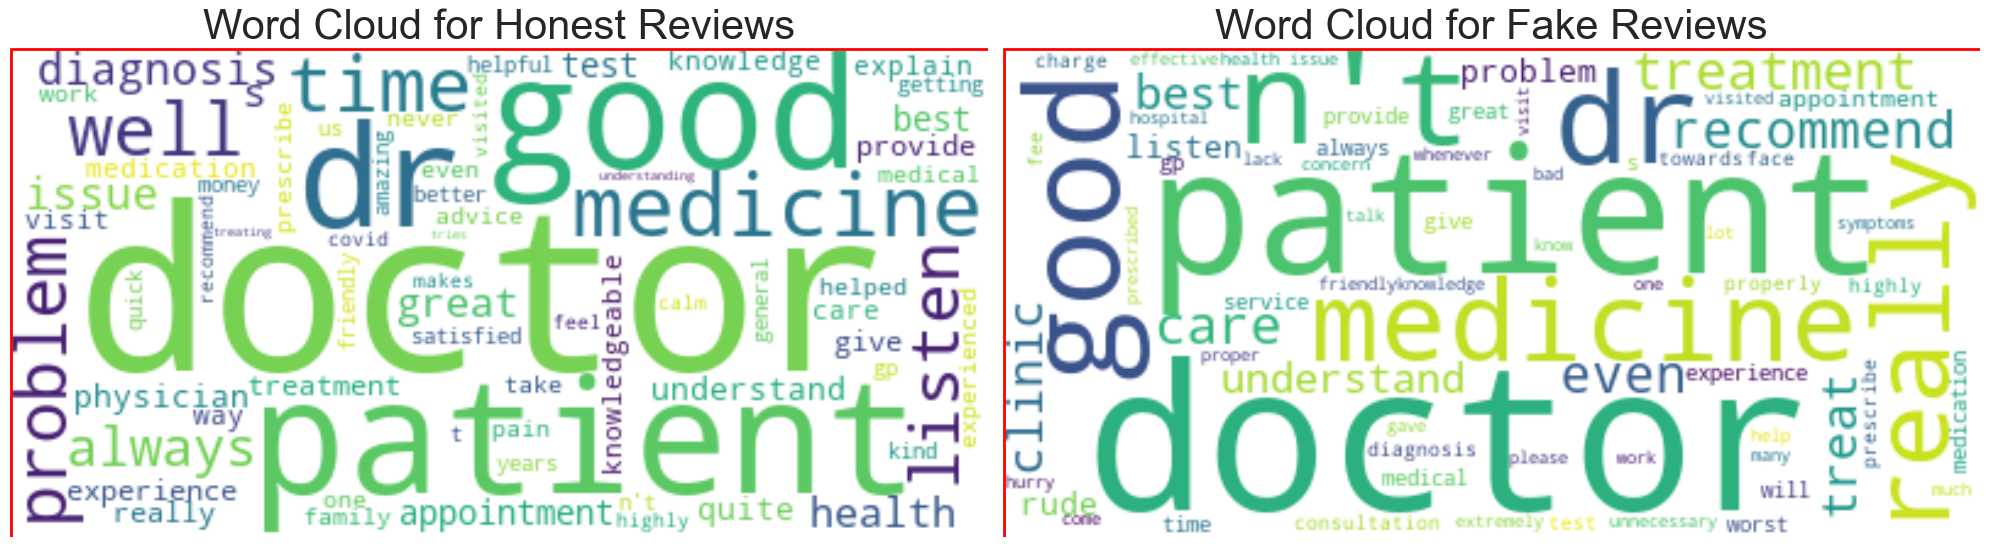

In [60]:
from wordcloud import WordCloud


# Extract tokenized comments based on Honest_Review column
honest_reviews_tokens = results_df[results_df['Honest_Review'] == 1]['tokenized_comment']
fake_reviews_tokens = results_df[results_df['Honest_Review'] == 0]['tokenized_comment']

def generate_word_cloud_for_subplot(ax, tokenized_reviews, title):
    # Convert tokenized reviews to single text
    text = ' '.join([' '.join(tokens) for tokens in tokenized_reviews])
    
    # Create and generate a word cloud image
    wordcloud = WordCloud(background_color="white", max_words=70, contour_width=3, contour_color='steelblue').generate(text)

    # Display the generated word cloud on the given axis
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title,fontsize=30)
    
# Draw a rectangle around the word cloud
    rect = plt.Rectangle((0, 0), wordcloud.width, wordcloud.height, edgecolor='red', linewidth=2, fill=False)
    ax.add_patch(rect)
    
# Define the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Generate word clouds for honest and fake reviews
generate_word_cloud_for_subplot(ax1, honest_reviews_tokens, title='Word Cloud for Honest Reviews')
generate_word_cloud_for_subplot(ax2, fake_reviews_tokens, title='Word Cloud for Fake Reviews')

# Provide space between the plots
plt.subplots_adjust(wspace=1)

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
# Drop unwanted columns
results_df.drop('Gender_new', axis=1, inplace=True)

### User rating vs Age Range chi test

In [62]:
# libraries import 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Select  columns 
age_range_columns = ['Age_Range_20-25', 'Age_Range_26-30', 'Age_Range_31-35', 'Age_Range_36-40', 'Age_Range_40+']
results_df['Age_Range'] = results_df[age_range_columns].idxmax(axis=1)

# create crosstab 
crosstab = pd.crosstab(results_df['Age_Range'], results_df['User_Rating'])

# perform  test
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")



Chi-Square Statistic: 12.919536254984143
P-value: 0.6786316966925785


## Correaltion matrix

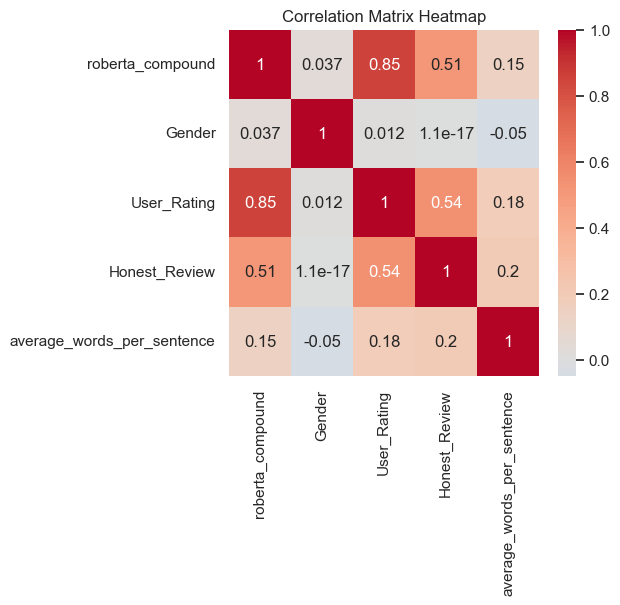

In [63]:
# Select specific columns for the correlation matrix
columns_to_correlate = ['roberta_compound','Gender', 
       'User_Rating', 'Honest_Review',
       'average_words_per_sentence']

# Compute the correlation matrix for the selected columns
correlation_matrix = results_df[columns_to_correlate].corr()

# Set Seaborn style
sns.set(style='white')

# Create a heatmap
plt.figure(figsize=(5, 4.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
# Save the plot to a PNG file
plt.savefig("heatmap.png", bbox_inches='tight', dpi=300)
plt.show()

 # Apply model

### Print all the columns which have been created  during visualisations

In [64]:
print(results_df.columns)

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Age_Range_20-25',
       'Age_Range_26-30', 'Age_Range_31-35', 'Age_Range_36-40',
       'Age_Range_40+', 'Gender', 'GP_Name', 'User_Rating', 'Review_Comment',
       'Honest_Review', 'Review_Comment_non_punctuation_lower',
       'tokenized_comment', 'pos_tags', 'average_words_per_sentence',
       'noun_ratio', 'adjective_ratio', 'preposition_ratio',
       'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio',
       'pronoun_ratio', 'roberta_compound', 'Age_Range'],
      dtype='object')


# Run Manual steps from here.


## Run Guide for  model
### Run 1 : Base + Linguistic feature: 

#### Step 1: In Separate target feature code just remove "Gender", "User Rating" and "average words per sentence"  from columns_to_drop and execute code
#### Step 2 : Populate "features_to_scale = ['average_words_per_sentence','User_Rating']" in Split train and test code section. Gender not need to scale. Execute code

#### Step 3: Run code for standard scaler

#### Step 4: Run implement model code

#### Step 5 : Run Plot confusion matrix code

#### Step 6 : Run Auc curve code




### Run 2 : Base + Linguistic feature + POS Features
#### Step 1: In Separate target feature code  remove "Gender", "User Rating" , "average words per sentence" and 'noun_ratio', 'adjective_ratio', 'preposition_ratio',  'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio' and 'pronoun_ratio' from columns_to_drop. Execute code

#### Step 2 : Populate "features_to_scale = ['average_words_per_sentence','User_Rating', 'noun_ratio', 'adjective_ratio', 'preposition_ratio',  'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio', 'pronoun_ratio']" in Split train and test code

#### Step 3-6 as explained above





### Run 3 : Base + Linguistic feature + POS Features+ Sentiment
#### Step 1: In Separate target feature code  remove "Gender", "User Rating" , "average words per sentence" and 'noun_ratio', 'adjective_ratio', 'preposition_ratio',  'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio', 'pronoun_ratio' and 'roberta_compound' from columns_to_drop. Execute code

#### Step 2 : Populate "features_to_scale = ['average_words_per_sentence','User_Rating', 'noun_ratio', 'adjective_ratio', 'preposition_ratio',  'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio', 'pronoun_ratio','roberta_compound']" in Split train and test code

#### Step 3-6 as explained above

### Download necessary libraries for model implementation

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


### Separate target feature

In [70]:
# Split data into features and target variable
columns_to_drop = ['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Age_Range_20-25',
       'Age_Range_26-30', 'Age_Range_31-35', 'Age_Range_36-40',
       'Age_Range_40+', 'Gender', 'GP_Name', 'User_Rating', 'Review_Comment',
       'Honest_Review', 'Review_Comment_non_punctuation_lower',
       'tokenized_comment', 'pos_tags', 'average_words_per_sentence',
       'noun_ratio', 'adjective_ratio', 'preposition_ratio',
       'determiner_ratio', 'verb_ratio', 'adverb_ratio', 'conjuction_ratio',
       'pronoun_ratio', 'roberta_compound', 'Age_Range']
      

X = results_df.drop(columns_to_drop, axis='columns')
y = results_df['Honest_Review']

### Split train and test

In [71]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standard Scaler apply

In [72]:
from sklearn.preprocessing import StandardScaler
# features to scale
features_to_scale = ['average_words_per_sentence','User_Rating']

scaler = StandardScaler()

# fit on training set
scaler.fit(X_train[features_to_scale])

# Apply to transform both training and test
X_train[features_to_scale] = scaler.transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

## Implement Model

In [73]:
# Initialize SVM classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.83      0.83      0.83        18

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



## Plot confusion matrix

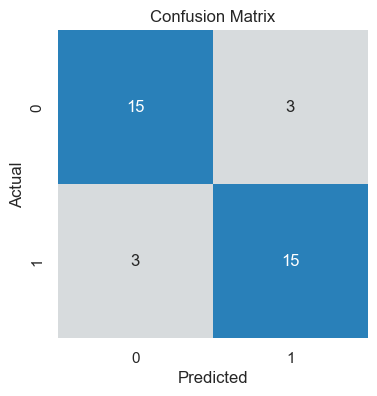

In [74]:
# Set Seaborn style
sns.set(style='white')
# Create a custom color palette for the heatmap
colors = ["#d7dbdd", "#2980b9"]
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## AUC curve stats

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

# initialize SVM classifier with true probability
svm_model = SVC(probability=True)

# fit the model on the training data
svm_model.fit(X_train, y_train)

# Get the probability scores of honest
y_scores = svm_model.predict_proba(X_test)[:, 1]

# Compute the AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.2f}")


AUC: 0.87


## T-test

In [76]:
import numpy as np
from scipy.stats import t

# Get data for honest and fake
fraudulent_reviews = results_df[results_df['Honest_Review'] == 0]['roberta_compound']
truthful_reviews = results_df[results_df['Honest_Review'] == 1]['roberta_compound']

#calculate mean
mean_fraudulent = np.mean(fraudulent_reviews)
mean_truthful = np.mean(truthful_reviews)

# std dev
std_fraudulent = np.std(fraudulent_reviews, ddof=1)  
std_truthful = np.std(truthful_reviews, ddof=1) 

n_fraudulent = len(fraudulent_reviews)
n_truthful = len(truthful_reviews)

# Compute  t-test
pooled_se = np.sqrt((std_fraudulent**2 / n_fraudulent) + (std_truthful**2 / n_truthful))

# Compute the t-statistic
t_stat = (mean_fraudulent - mean_truthful) / pooled_se

# Degree of freedom
df = min(n_fraudulent, n_truthful) - 1

# Two-tailed test for the 5% significance level
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)



print("T-Statistic:", abs(t_stat).round(2))
print("T-critical:", t_critical.round(2))


T-Statistic: 7.88
T-critical: 1.99
